# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Домашнее задание <a class="anchor" id="hw"></a><center>

### 1. Подберите скорость обучения (eta) и количество итераций

In [16]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [17]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
n = X.shape[0]



# ИЗМЕНЕНИЯ
eta = 1e-1 
n_iter = 250
W = np.array([0.5, 0.5])
# ИЗМЕНЕНИЯ


print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [0.5 0.5] 

Iteration #0: W_new = [11.4 38.5], MSE = 3102.0
Iteration #10: W_new = [12752.8082105  70175.53377537], MSE = 18605907474.13
Iteration #20: W_new = [ 7794462.78878402 42983671.5156699 ], MSE = 9275866959916852.0
Iteration #30: W_new = [1.07197580e+09 5.91159034e+09], MSE = 2.3654185763886816e+20
Iteration #40: W_new = [3.02534648e+10 1.66837812e+11], MSE = 2.5861306182234217e+23
Iteration #50: W_new = [1.56591497e+11 8.63550102e+11], MSE = 9.726486449868705e+24
Iteration #60: W_new = [1.28767019e+11 7.10107349e+11], MSE = 9.502114053142176e+24
Iteration #70: W_new = [1.39250106e+10 7.67918089e+10], MSE = 1.667289958811078e+23
Iteration #80: W_new = [1.52890895e+08 8.43142271e+08], MSE = 3.175879727287169e+19
Iteration #90: W_new = [117328.84387172 646785.89212586], MSE = 31821746616003.92
Iteration #100: W_new = [48.44615246 23.15282911], MSE = 54380.24
Iteration #110: W_new = [44.976156    3.82816

### 2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [24]:
n = X.shape[0]

eta = 1e-2 
n_iter = 700

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))

     # ИЗМЕНЕНИЯ: транспонируем матрицу
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

### 3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

Норма — функционал, заданный на векторном пространстве и обобщающий понятие длины вектора или абсолютного значения числа.


In [25]:
# зададим векторы
weights0 = np.array([0.5, 0.5])
weights1 = np.array([2.5, 1.5])


In [26]:
# найдем растояние между весами (векторами)
np.linalg.norm(weights0 - weights1, ord=2)

2.23606797749979

In [27]:
# визуализируем
def plot_vectors(a, b):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot([a[0]], [a[1]], '*', c='r')
    ax.plot([b[0]], [b[1]], '+', c='g')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    return ax

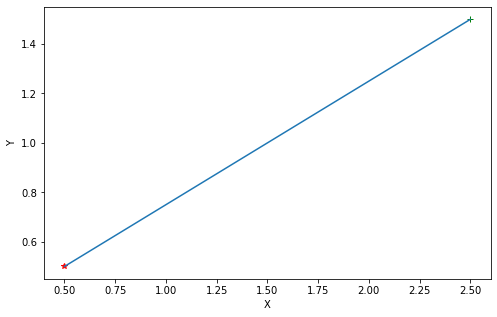

In [28]:
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights1[1]]);

L2 norm / Евклидова метрика:
Евклидова метрика (евклидово расстояние) — метрика в евклидовом пространстве — расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора. 

a ** 2 + b ** 2 = c ** 2


In [29]:
# найдем растояние между весами (векторами)
((weights1[0]-weights0[0])**2 + (weights1[1] - weights0[1])**2)**0.5

2.23606797749979

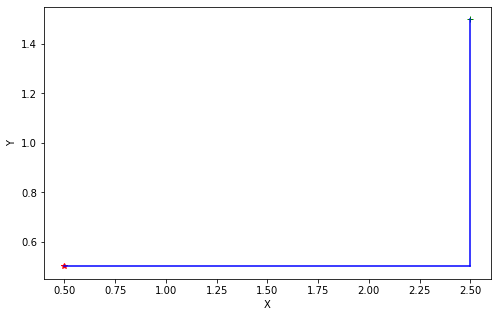

In [30]:
# визуализируем
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights0[1]], c='b')
ax.plot([weights1[0], weights1[0]], [weights0[1], weights1[1]], c='b');

L1 norm / Расстояние городских кварталов:
Расстояние городских кварталов d1 между двумя векторами p,q в n-мерном вещественном векторном пространстве с заданной системой координат — сумма длин проекций отрезка между точками на оси координат. на плоскости расстояние городских кварталов между (p_{1},p_{2}) и  (q_{1},q_{2}) равно |p_{1}-q_{1}|+|p_{2}-q_{2}|.

abs(p1-q1) + abs(p2-q2)


In [31]:
abs(weights1[0]-weights0[0]) + abs(weights1[1] - weights0[1])


3.0

У нас получилось 3 варианта расстояний, можем брать любое, чаще всего это l1 или l2.

In [32]:
n = X.shape[0]

eta = 1e-2 
epsilon = 1e-5
iter_num = 0

# инициализируем веса маленькими величинами
W = np.array([0.5, 0.5])

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

# задаем изначально бесконечно большое число
weight_dist = np.inf

while weight_dist > epsilon:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
# умножаем скорость обучения на градиент (происходит оптимизация веса)
    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    
# находим растояние между весами (векторами)    
    weight_dist = np.linalg.norm(W_new - W, ord=2)
    
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [0.5 0.5] 

Iteration #0: W_new = [1.59 4.3 ], MSE = 3102.0
Iteration #10: W_new = [ 6.56331187 10.69550943], MSE = 754.73
Iteration #20: W_new = [ 9.94926955 10.17843838], MSE = 635.4
Iteration #30: W_new = [13.02350016  9.62226131], MSE = 536.38
Iteration #40: W_new = [15.82839082  9.11365473], MSE = 453.94
Iteration #50: W_new = [18.38772168  8.64955977], MSE = 385.3
Iteration #60: W_new = [20.72299319  8.22609429], MSE = 328.15
Iteration #70: W_new = [22.8538209   7.83970154], MSE = 280.57
Iteration #80: W_new = [24.79810306  7.48713594], MSE = 240.96
Iteration #90: W_new = [26.572171    7.16543608], MSE = 207.97
Iteration #100: W_new = [28.19092629  6.87189976], MSE = 180.52
Iteration #110: W_new = [29.66796594  6.60406139], MSE = 157.65
Iteration #120: W_new = [31.01569661  6.35967122], MSE = 138.62
Iteration #130: W_new = [32.24543878  6.13667644], MSE = 122.77
Iteration #140: W_new = [33.36752188  5.9